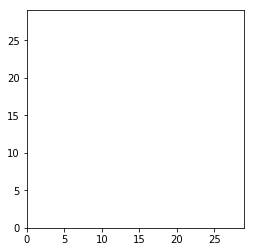

3600.0


In [243]:
import numpy as np
import matplotlib.pyplot as plt

# Define geometry
## 2D, L^2

global L, MCS, J, spin_init
L = 30
MCS = L**2
J = 1
spin_init = 'up'
 
grid_x = range(L)
grid_y = range(L)
grid_coordinates_x, grid_coordinates_y = np.meshgrid(grid_x, grid_y) 
grid_coordinates_x = np.reshape(grid_coordinates_x,(1,-1))
grid_coordinates_y = np.reshape(grid_coordinates_y,(1,-1))

grid_spins = assign_spin()
spin_plot = grid_plot(grid_coordinates_x, grid_coordinates_y, grid_spins)
plt.show(spin_plot)


spin_site_numbers = range(MCS)

system_energy = 0
for spin_site_number in spin_site_numbers:
    spin_site_x = grid_coordinates_x[0][spin_site_number]
    spin_site_y = grid_coordinates_y[0][spin_site_number]
    system_energy += spin_site_energy(spin_site_x, spin_site_y)
print(system_energy)

# Initial conditions
## All spin up or all down or random

# Determine initial energy
## Depends on up down or random

# Choose spin at random 
## Check if the energy gain is positive or negative
### Depending on losing or gaining directly accept or accept with a certain probability

# If flipped, adapt the initial energy. 

# MC integration to determine quantities 


In [234]:
def grid_plot(x, y, S):
    import matplotlib.cm as cm
    image = plt.imshow(S, extent=(x.min(), x.max(), y.min(),y.max()), interpolation='nearest', cmap=cm.gray)
    plt.clim(-1,1)
    return image


def assign_spin():
    grid_spins = np.random.rand(L,L)
    if spin_init == 'random':
        grid_spins[grid_spins >=0.5] = 1
        grid_spins[grid_spins < 0.5] = -1
    elif spin_init == 'up':
        grid_spins[grid_spins < 1] = 1
    elif spin_init == 'down':
        grid_spins[grid_spins < 1] = -1
    return grid_spins


def spin_site_energy(spin_site_x, spin_site_y):
    spin_site_energy = 0
    
    spin_neigbour_x = np.array([spin_site_x+1, spin_site_x-1, spin_site_x, spin_site_x])%(L-1)
    spin_neigbour_y = np.array([spin_site_y, spin_site_y, spin_site_y+1, spin_site_y-1])%(L-1)
    for i in range(np.size(spin_neigbour_x)):
        spin_value_center = grid_spins[spin_site_x, spin_site_y]
        spin_value_neighbour = grid_spins[spin_neigbour_x[i], spin_neigbour_y[i]]

        spin_site_energy += J*spin_value_center*spin_value_neighbour
    return spin_site_energy 